In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Veri Seti: https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data


In [2]:
base_url = "../data/week-6-data/"
dataset_url = base_url + "housing.csv"

#### **IMPORTING DATASETS**

In [3]:
df = pd.read_csv(dataset_url)

#### Veri Seti Hikayesi ve Yapısının İncelenmesi

Veri setimizin ilk 10 gözlemini görüntüleyelim.

In [4]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Veri setindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Kategorik Niteliklerin İşlenmesi

In [7]:
def dummies(df, columns):
    for column in columns:
        df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True).astype(int)], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

columns_to_encode = ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']
df = dummies(df, columns_to_encode)

In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
540,1820000,3000,2,1,1,2,1,0,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,0,1,0,0,0,0,0,0,1


In [9]:
df.shape

(545, 14)

### All the data features in the range [0,1]

In [10]:
# MinMaxScaler() scales all the data features in the range [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


Veri setindeki sayısal sütunlar için özet istatistikleri gösterelim.

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.261189,0.240587,0.393028,0.095413,0.268502,0.231193,0.858716,0.177982,0.045872,0.350459,0.315596,0.234862,0.416514,0.326606
std,0.161943,0.149151,0.147613,0.167490,0.289164,0.287195,0.348635,0.382849,0.209399,0.477552,0.465180,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.134021,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.224242,0.202749,0.400000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.323711,0.400000,0.333333,0.333333,0.333333,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
cdf = df[['area','bedrooms','bathrooms','stories','price']]
cdf.head(10)

,area,bedrooms,bathrooms,stories,price
0,0.396564,0.6,0.333333,0.666667,1.000000
1,0.502405,0.6,1.000000,1.000000,0.909091
2,0.571134,0.4,0.333333,0.333333,0.909091
3,0.402062,0.6,0.333333,0.333333,0.906061
4,0.396564,0.6,0.000000,0.333333,0.836364
5,0.402062,0.4,0.666667,0.000000,0.787879
6,0.476289,0.6,0.666667,1.000000,0.727273
7,1.000000,0.8,0.666667,0.333333,0.727273
8,0.443299,0.6,0.000000,0.333333,0.703030
9,0.281787,0.4,0.333333,1.000000,0.696970


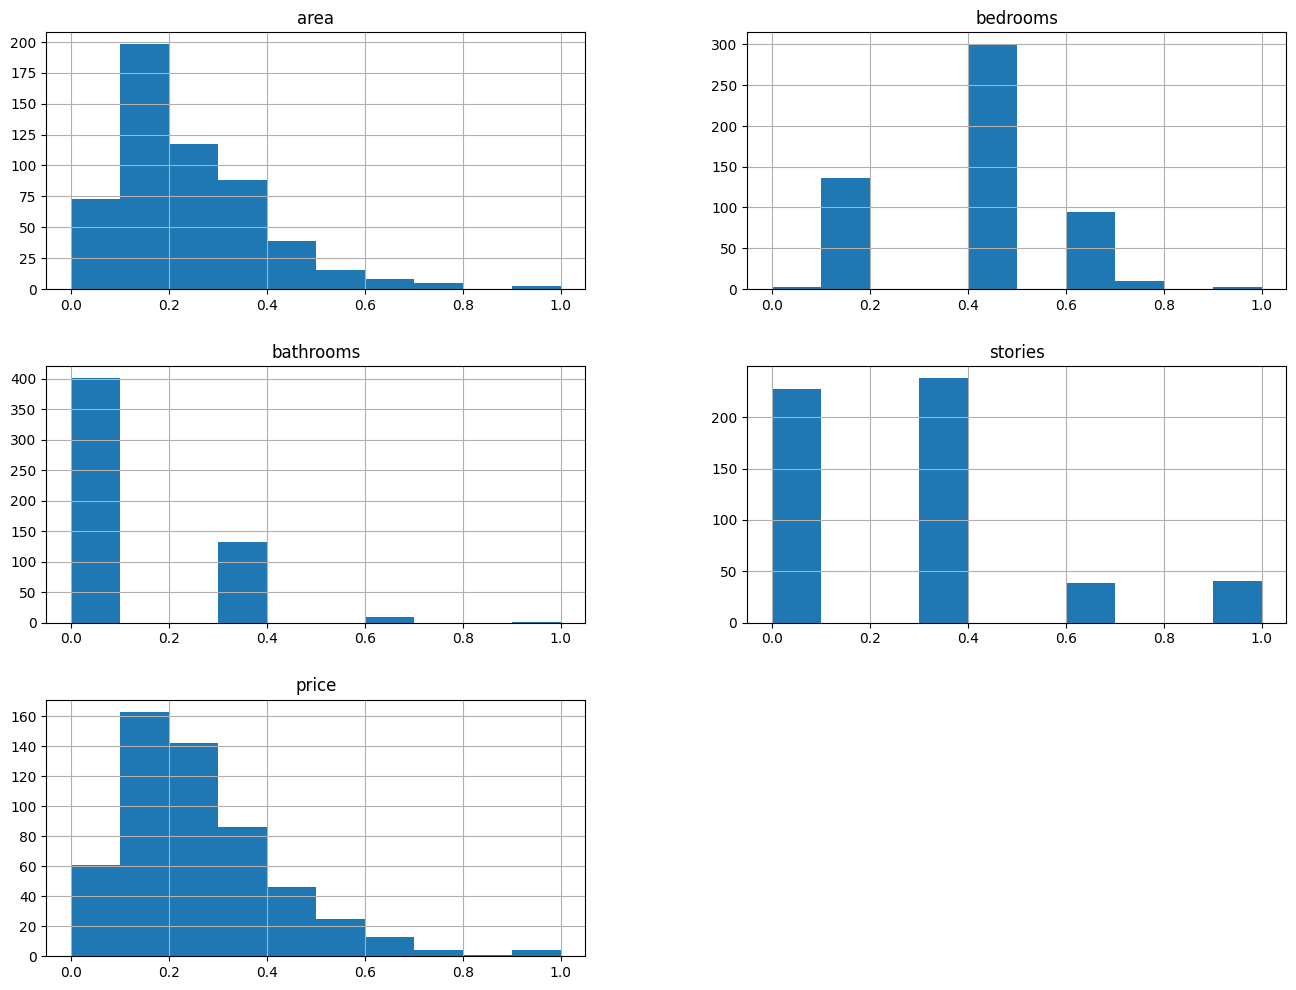

In [13]:
plt.rcParams['figure.figsize'] = (16,12)

viz = cdf[['area','bedrooms','bathrooms','stories','price']]
viz.hist()
plt.show()

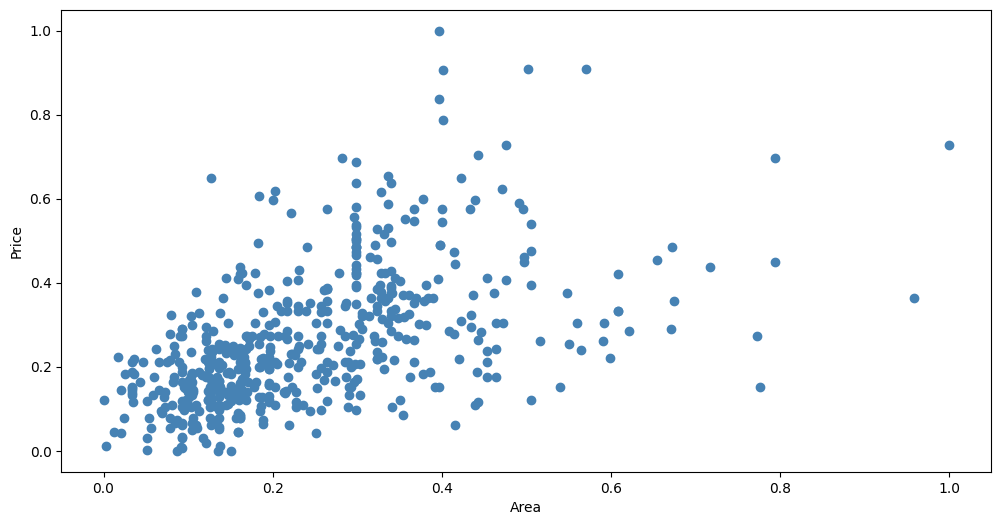

In [14]:
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(cdf.area, cdf.price, color='steelblue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

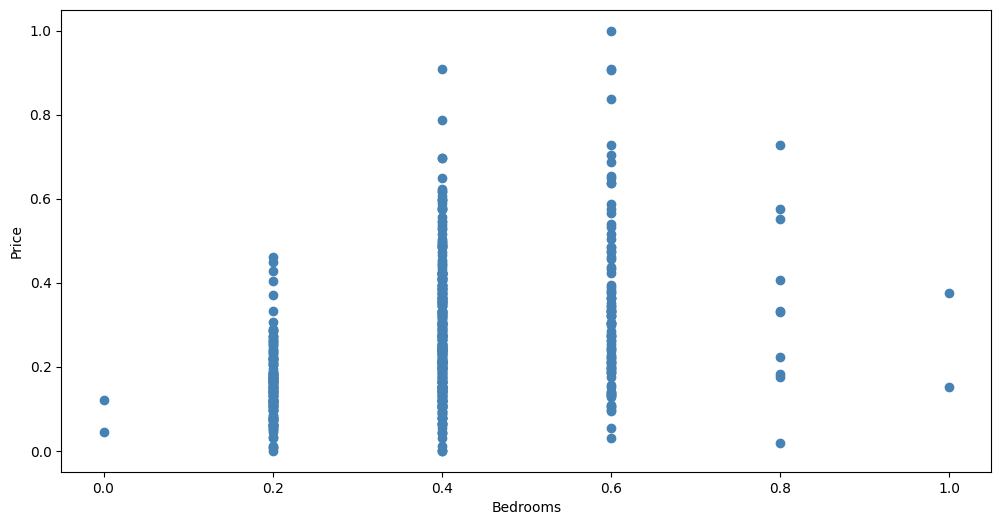

In [15]:
plt.scatter(cdf.bedrooms, cdf.price, color='steelblue')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='area', ylabel='price'>

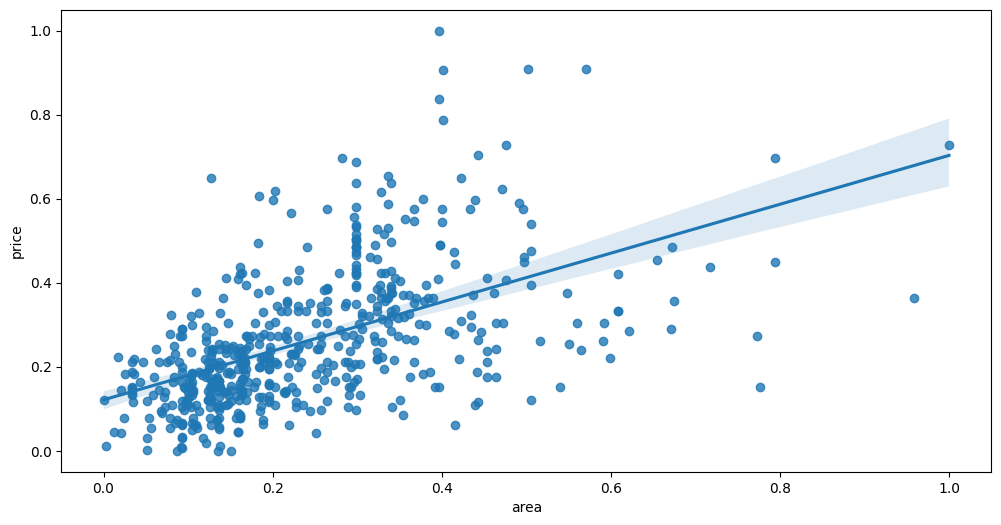

In [16]:
import seaborn as sns

sns.regplot(x=df['area'], y=df['price'])

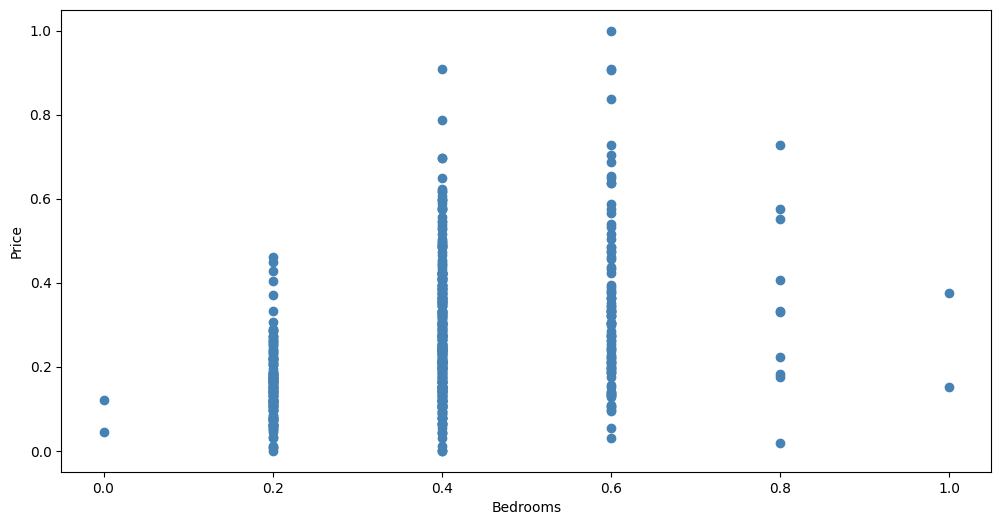

In [17]:
plt.scatter(cdf.bedrooms, cdf.price, color='steelblue')
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

In [18]:
msk = np.random.rand(len(df)) < 0.8 # 80% of data for training
# array([False,  True,  True, ..., False, False,  True])
train = cdf[msk]
test = cdf[~msk]

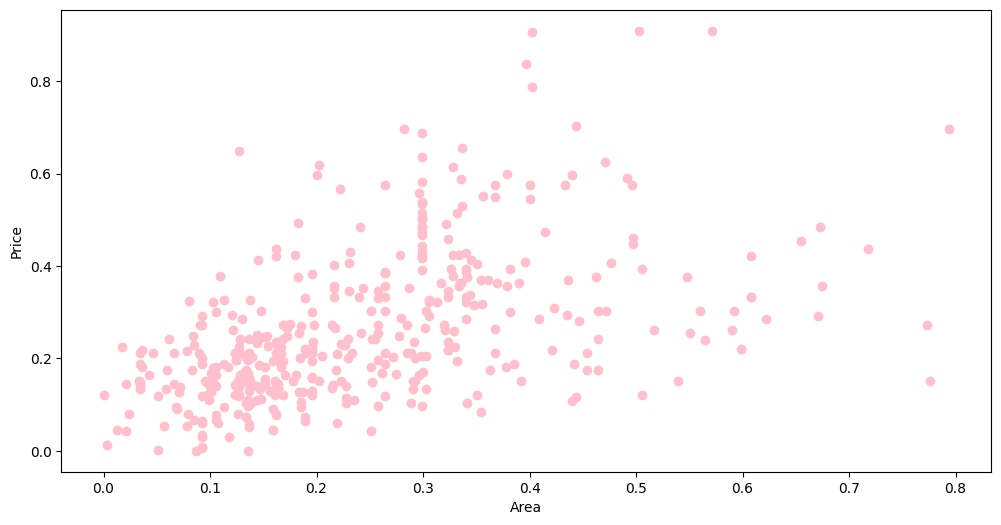

In [19]:
plt.scatter(train.area, train.price, color='pink')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

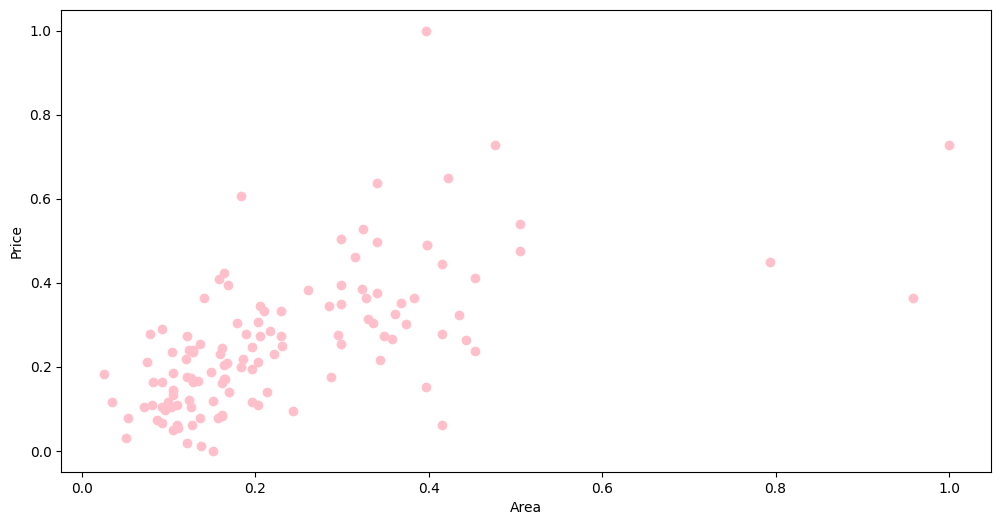

In [20]:
plt.scatter(test.area, test.price, color='pink')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # instance of linear regression

# DataFrame'in değerlerini Numpy Array'e çevirmek için values kullanılır.
train_x = train[['area']].values
train_y = train[['price']].values
print(type(train_x))
print(type(train_y))
regr.fit(train_x, train_y) # fit the data

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression()

In [22]:
print(regr.coef_) # slope
print(regr.intercept_) # intercept
# y = mx + b
# y = regr.coef_ * x + intercept_

[[0.56082731]]
[0.12596252]


# Simple Regression Formula

y^= θ0 + θ1 + x1

y = a*x + b

y = m*x + b

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Text(0, 0.5, 'Price')

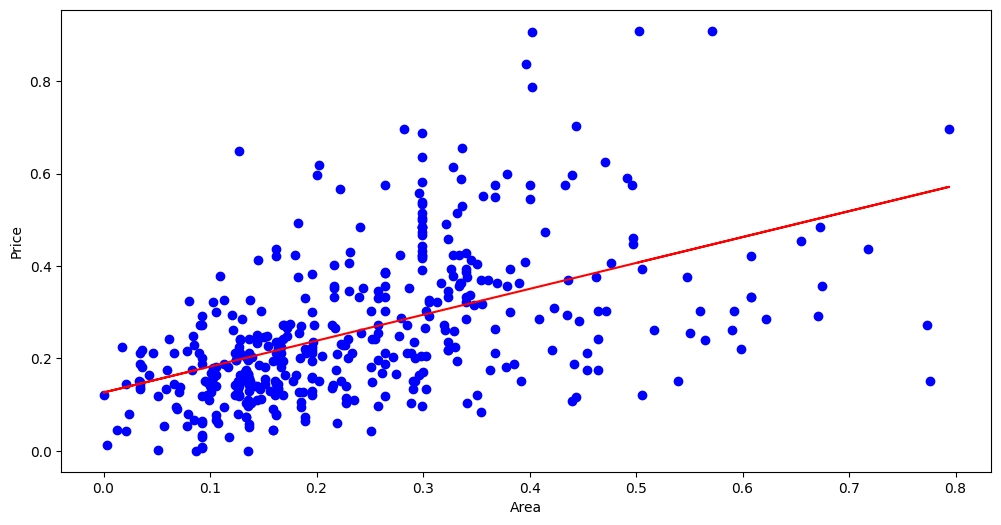

In [23]:
plt.scatter(train.area, train.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

# Model evaluation metrics:

In [24]:
from sklearn.metrics import r2_score

test_x = test[['area']].values
test_y = test[['price']].values
test_y_ = regr.predict(test_x)

In [25]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 0.10
Residual sum of squares (MSE): 0.02
R2-score: -1.13


In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = train[['bedrooms']].values
train_y = train[['price']].values
regr.fit(train_x, train_y)

test_x = test[['bedrooms']].values
test_y = test[['price']].values
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 0.11
Residual sum of squares (MSE): 0.02
R2-score: -6.29


How to estimate multiple linear regression parameters?
- How to estimate ?
    - Ordinary Least Squares:
        - Takes long time for large datasets (10K+ rows)
    - An optization algorithm
        - Gradient Descent

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = train[['area','bedrooms','stories']].values
y = train[['price']].values

regr.fit(x, y)

LinearRegression()

In [28]:
print('Coefficients: ', regr.coef_)

Coefficients:  [[0.52087009 0.17092909 0.18248487]]


In [29]:
# Prediction
# Test veri setimiz, gerçek verisetimizden gelmektedir.
y_hat = regr.predict(test[['area','bedrooms','stories']].values)
x = test[['area','bedrooms','stories']].values
y = test[['price']].values

print("Mean Squared Error: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance Score: %.2f" % regr.score(x, y)) # explained variance,  best score is 1.0

Mean Squared Error: 0.01
Variance Score: 0.52


In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,hotwaterheating_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
msk = np.random.rand(len(df)) < 0.8 # 80% of data for training
# array([False,  True,  True, ..., False, False,  True])
train = df[msk]
test = df[~msk]

In [32]:
regr = linear_model.LinearRegression()
x = train[['area','bedrooms','bathrooms','stories','parking', 'furnishingstatus_semi-furnished']].values
y = train[['price']].values

regr.fit(x, y)

print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.39378663 0.08291545 0.28399371 0.14286334 0.11110083 0.01302619]]


In [33]:
y_ = regr.predict(test[['area','bedrooms','bathrooms','stories','parking','furnishingstatus_semi-furnished']].values)
x = test[['area','bedrooms','bathrooms','stories','parking','furnishingstatus_semi-furnished']].values
y = test[['price']].values

print("Mean Squared Error: %.2f" % np.mean((y_ - y) ** 2))
print("Variance Score: %.2f" % regr.score(x, y))

Mean Squared Error: 0.01
Variance Score: 0.57
